<a href="https://colab.research.google.com/github/wakooota/titanic/blob/main/titanic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#csvファイルをダウンロード
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=485a0efae93fc8a21408836ffc714c11e81c643f59fc48f13be93091f50ad963
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [7]:
import japanize_matplotlib

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train["Number"] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


   Pclass  Number  Survived  Surv_rate
0       1     216       136  62.962963
1       2     184        87  47.282609
2       3     491       119  24.236253


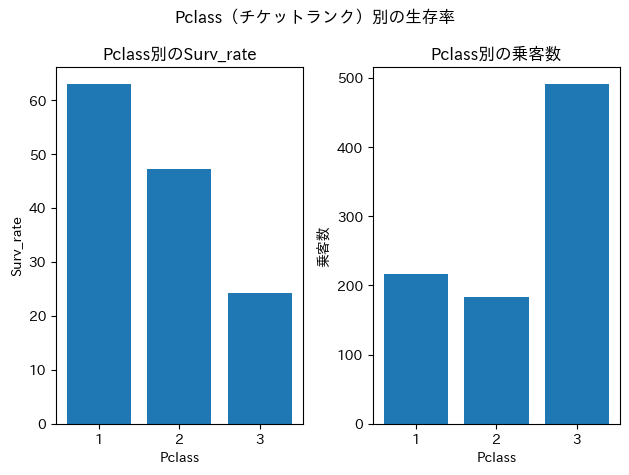

In [17]:
#Pclass（チケットランク）別の生存率
train_pclass = pd.pivot_table(train[["Pclass", "Survived", "Number"]], index="Pclass", aggfunc="sum").reset_index()
train_pclass["Surv_rate"]=(train_pclass["Survived"]/train_pclass["Number"])*100
print(train_pclass)

plt.figure()  #figsize=を括弧内に入れて、文字を見やすくすることもできる

plt.subplot(1,2,1)
plt.bar(train_pclass["Pclass"], train_pclass["Surv_rate"])
plt.title("Pclass別のSurv_rate")
plt.xlabel("Pclass")
plt.ylabel("Surv_rate")


plt.subplot(1,2,2)
plt.bar(train_pclass["Pclass"], train_pclass["Number"])
plt.title("Pclass別の乗客数")
plt.xlabel("Pclass")
plt.ylabel("乗客数")

plt.suptitle("Pclass（チケットランク）別の生存率") #全体のタイトル
plt.tight_layout() #上下・左右に並んだグラフのスペースを調整してくれる（軸名等がグラフに重ならない）

plt.show() #plt.figureのを終わる時のフレーズこれがない場合は、最後のグラフに追加でプロットされることになる。

      Sex  Number  Survived  Surv_rate
0  female     314       233  74.203822
1    male     577       109  18.890815


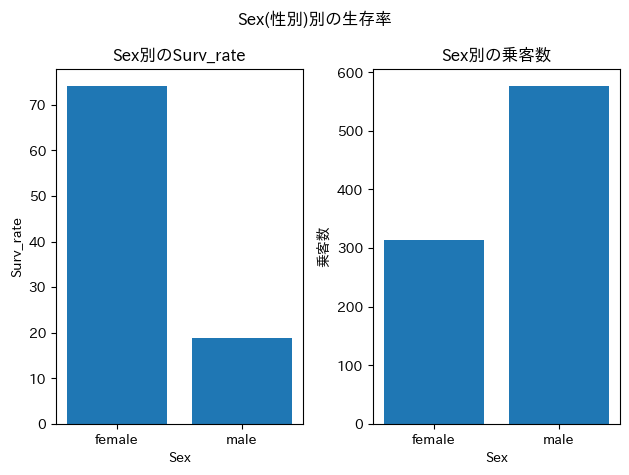

In [16]:
#Sex(性別)別の生存率
train_sex = pd.pivot_table(train[["Sex", "Survived", "Number"]], index="Sex", aggfunc="sum").reset_index()
train_sex["Surv_rate"]=(train_sex["Survived"]/train_sex["Number"])*100
print(train_sex)

plt.figure()

plt.subplot(1,2,1)
plt.bar(train_sex["Sex"], train_sex["Surv_rate"])
plt.title("Sex別のSurv_rate")
plt.xlabel("Sex")
plt.ylabel("Surv_rate")

plt.subplot(1,2,2)
plt.bar(train_sex["Sex"], train_sex["Number"])
plt.title("Sex別の乗客数")
plt.xlabel("Sex")
plt.ylabel("乗客数")

plt.suptitle("Sex(性別)別の生存率")

plt.tight_layout() #上下・左右に並んだグラフのスペースを調整してくれる（軸名等がグラフに重ならない）

plt.show()

In [15]:
#Age(年齢)別の生存率
train["Age"].unique

<bound method Series.unique of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [16]:
~train["Age"].isnull()

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool

         Age_flag  Number  Survived   Surv_rate
0     01_0歳以上5歳未満      40        27   67.500000
1    02_5歳以上10歳未満      22        11   50.000000
2   03_10歳以上15歳未満      16         7   43.750000
3   04_15歳以上20歳未満      86        34   39.534884
4   05_20歳以上25歳未満     114        39   34.210526
5   06_25歳以上30歳未満     106        38   35.849057
6   07_30歳以上35歳未満      95        40   42.105263
7   08_35歳以上40歳未満      72        33   45.833333
8   09_40歳以上45歳未満      48        18   37.500000
9   10_45歳以上50歳未満      41        16   39.024390
10  11_50歳以上55歳未満      32        14   43.750000
11  12_55歳以上60歳未満      16         6   37.500000
12  13_60歳以上65歳未満      15         6   40.000000
13  14_65歳以上70歳未満       4         0    0.000000
14  15_70歳以上75歳未満       6         0    0.000000
15       17_80歳以上       1         1  100.000000
16      18_99_欠損値     177        52   29.378531


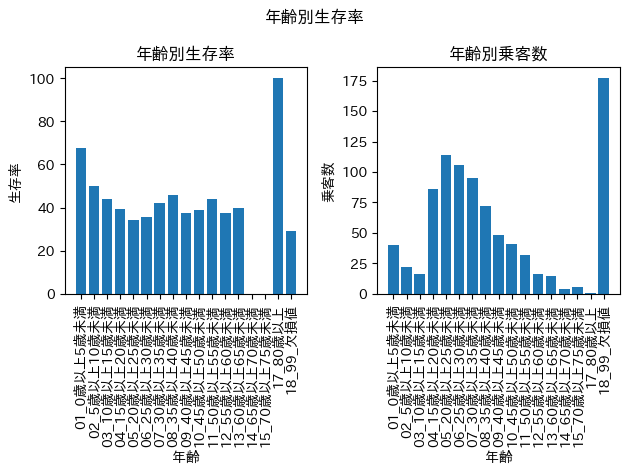

In [21]:
train["Age_flag"] ="18_99_欠損値"

train.loc[~train["Age"].isnull(), "Age_flag"] = "17_80歳以上"
train.loc[train["Age"]<80, "Age_flag"] = "16_75歳以上80歳未満"
train.loc[train["Age"]<75, "Age_flag"] = "15_70歳以上75歳未満"
train.loc[train["Age"]<70, "Age_flag"] = "14_65歳以上70歳未満"
train.loc[train["Age"]<65, "Age_flag"] = "13_60歳以上65歳未満"
train.loc[train["Age"]<60, "Age_flag"] = "12_55歳以上60歳未満"
train.loc[train["Age"]<55, "Age_flag"] = "11_50歳以上55歳未満"
train.loc[train["Age"]<50, "Age_flag"] = "10_45歳以上50歳未満"
train.loc[train["Age"]<45, "Age_flag"] = "09_40歳以上45歳未満"
train.loc[train["Age"]<40, "Age_flag"] = "08_35歳以上40歳未満"
train.loc[train["Age"]<35, "Age_flag"] = "07_30歳以上35歳未満"
train.loc[train["Age"]<30, "Age_flag"] = "06_25歳以上30歳未満"
train.loc[train["Age"]<25, "Age_flag"] = "05_20歳以上25歳未満"
train.loc[train["Age"]<20, "Age_flag"] = "04_15歳以上20歳未満"
train.loc[train["Age"]<15, "Age_flag"] = "03_10歳以上15歳未満"
train.loc[train["Age"]<10, "Age_flag"] = "02_5歳以上10歳未満"
train.loc[train["Age"]<5, "Age_flag"] = "01_0歳以上5歳未満"

train_age = pd.pivot_table(train[["Age_flag", "Survived", "Number"]], index="Age_flag", aggfunc="sum").reset_index()
train_age["Surv_rate"]=(train_age["Survived"]/train_age["Number"])*100
print(train_age)

plt.figure()
plt.subplot(1, 2, 1)
plt.bar(train_age["Age_flag"], train_age["Surv_rate"])
plt.xticks(rotation=90)
plt.title("年齢別生存率")
plt.xlabel("年齢")
plt.ylabel("生存率")

plt.subplot(1, 2, 2)
plt.bar(train_age["Age_flag"], train_age["Number"])
plt.xticks(rotation=90)
plt.title("年齢別乗客数")
plt.xlabel("年齢")
plt.ylabel("乗客数")

plt.suptitle("年齢別生存率")

plt.tight_layout()
plt.show()

   SibSp  Number  Survived  Surv_rate
0      0     608       210  34.539474
1      1     209       112  53.588517
2      2      28        13  46.428571
3      3      16         4  25.000000
4      4      18         3  16.666667
5      5       5         0   0.000000
6      8       7         0   0.000000


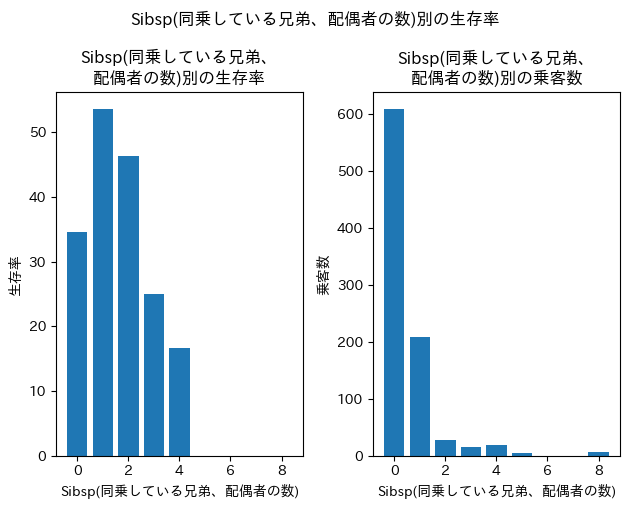

In [35]:
#Sibsp(同乗している兄弟、配偶者の数)別の生存率
train_sibsp = pd.pivot_table(train[["SibSp", "Survived", "Number"]], index="SibSp", aggfunc="sum").reset_index()
train_sibsp["Surv_rate"]=(train_sibsp["Survived"]/train_sibsp["Number"])*100
print(train_sibsp)

plt.figure()

plt.subplot(1,2,1)
plt.bar(train_sibsp["SibSp"], train_sibsp["Surv_rate"])
plt.title("Sibsp(同乗している兄弟、\n配偶者の数)別の生存率")
plt.xlabel("Sibsp(同乗している兄弟、配偶者の数)")
plt.ylabel("生存率")

plt.subplot(1,2,2)
plt.bar(train_sibsp["SibSp"], train_sibsp["Number"])
plt.title("Sibsp(同乗している兄弟、\n配偶者の数)別の乗客数")
plt.xlabel("Sibsp(同乗している兄弟、配偶者の数)")
plt.ylabel("乗客数")

plt.tight_layout()
plt.suptitle("Sibsp(同乗している兄弟、配偶者の数)別の生存率", x=0.5, y= 1.05) #グラフ全体のタイトル位置を調整
plt.show()

   Parch  Number  Survived  Surv_rate
0      0     678       233  34.365782
1      1     118        65  55.084746
2      2      80        40  50.000000
3      3       5         3  60.000000
4      4       4         0   0.000000
5      5       5         1  20.000000
6      6       1         0   0.000000


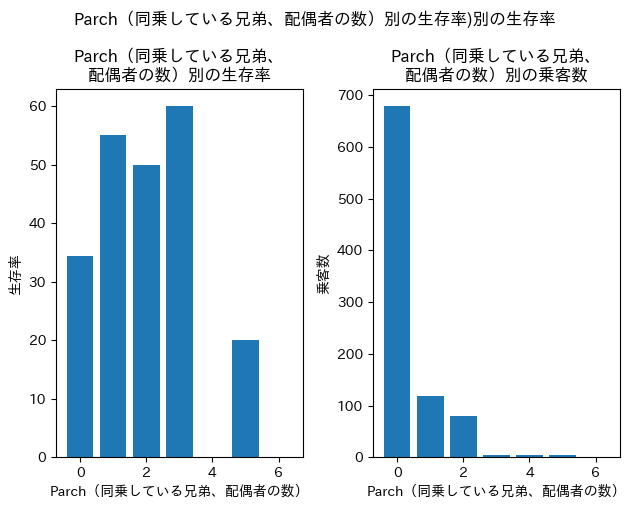

In [39]:
#Parch（同乗している兄弟、配偶者の数）別の生存率
train_parch = pd.pivot_table(train[["Parch", "Survived", "Number"]], index="Parch", aggfunc="sum").reset_index()
train_parch["Surv_rate"]=(train_parch["Survived"]/train_parch["Number"])*100
print(train_parch)

plt.figure()

plt.subplot(1,2,1)
plt.bar(train_parch["Parch"], train_parch["Surv_rate"])
plt.title("Parch（同乗している兄弟、\n配偶者の数）別の生存率")
plt.xlabel("Parch（同乗している兄弟、配偶者の数）")
plt.ylabel("生存率")

plt.subplot(1,2,2)
plt.bar(train_parch["Parch"], train_parch["Number"])
plt.title("Parch（同乗している兄弟、\n配偶者の数）別の乗客数")
plt.xlabel("Parch（同乗している兄弟、配偶者の数）")
plt.ylabel("乗客数")

plt.tight_layout()
plt.suptitle("Parch（同乗している兄弟、配偶者の数）別の生存率)別の生存率", x=0.5, y=1.05)
plt.show()


Text(0, 0.5, '運賃')

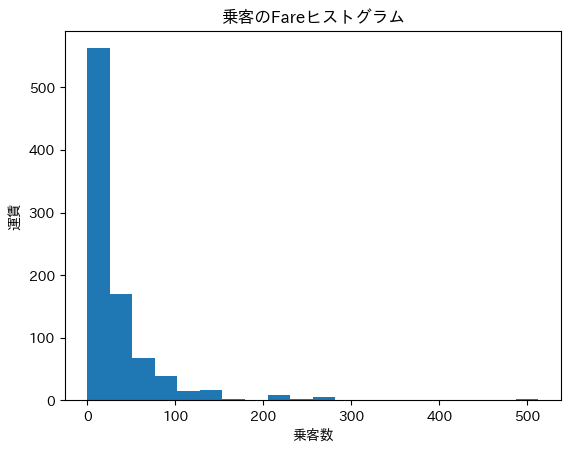

In [40]:
#乗客のFareヒストグラム
plt.hist(train["Fare"], bins=20)
plt.title("乗客のFareヒストグラム")
plt.xlabel("乗客数")
plt.ylabel("運賃")


In [21]:
train.isnull().sum()
#Fareの欠損値はなし

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Number           0
Age_flag         0
dtype: int64

        Fare_flag  Number  Survived   Surv_rate
0      01_0以上10未満     336        67   19.940476
1     02_10以上20未満     179        76   42.458101
2     03_20以上30未満     136        58   42.647059
3     04_30以上40未満      64        28   43.750000
4     05_40以上50未満      15         4   26.666667
5     06_50以上60未満      39        27   69.230769
6     07_60以上70未満      17         6   35.294118
7     08_70以上80未満      29        17   58.620690
8     09_80以上90未満      15        13   86.666667
9    10_90以上100未満       8         7   87.500000
10  11_100以上110未満       4         2   50.000000
11  12_110以上120未満       7         5   71.428571
12  13_120以上130未満       4         4  100.000000
13  14_130以上140未満       7         6   85.714286
14  15_140以上150未満       2         2  100.000000
15       16_150以上      29        20   68.965517


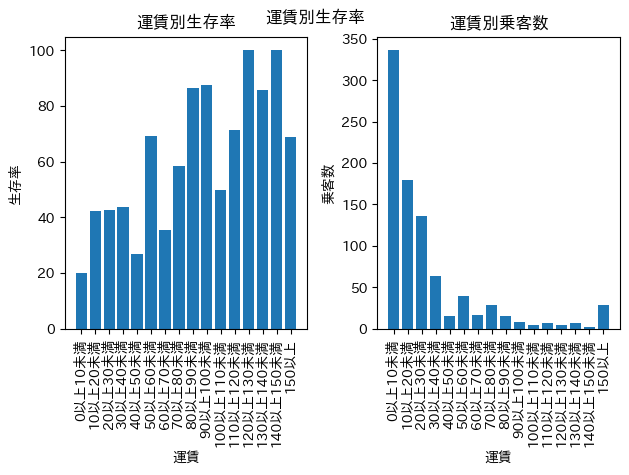

In [44]:
train["Fare_flag"] ="16_150以上"
train.loc[train["Fare"]<150, "Fare_flag"] = "15_140以上150未満"
train.loc[train["Fare"]<140, "Fare_flag"] = "14_130以上140未満"
train.loc[train["Fare"]<130, "Fare_flag"] = "13_120以上130未満"
train.loc[train["Fare"]<120, "Fare_flag"] = "12_110以上120未満"
train.loc[train["Fare"]<110, "Fare_flag"] = "11_100以上110未満"
train.loc[train["Fare"]<100, "Fare_flag"] = "10_90以上100未満"
train.loc[train["Fare"]<90, "Fare_flag"] = "09_80以上90未満"
train.loc[train["Fare"]<80, "Fare_flag"] = "08_70以上80未満"
train.loc[train["Fare"]<70, "Fare_flag"] = "07_60以上70未満"
train.loc[train["Fare"]<60, "Fare_flag"] = "06_50以上60未満"
train.loc[train["Fare"]<50, "Fare_flag"] = "05_40以上50未満"
train.loc[train["Fare"]<40, "Fare_flag"] = "04_30以上40未満"
train.loc[train["Fare"]<30, "Fare_flag"] = "03_20以上30未満"
train.loc[train["Fare"]<20, "Fare_flag"] = "02_10以上20未満"
train.loc[train["Fare"]<10, "Fare_flag"] = "01_0以上10未満"


train_fare = pd.pivot_table(train[["Fare_flag", "Survived", "Number"]], index="Fare_flag", aggfunc="sum").reset_index()
train_fare["Surv_rate"]=(train_fare["Survived"]/train_fare["Number"])*100
print(train_fare)

label = ["0以上10未満", "10以上20未満", "20以上30未満","30以上40未満", "40以上50未満", "50以上60未満", "60以上70未満", "70以上80未満", "80以上90未満", "90以上100未満", "100以上110未満", "110以上120未満", "120以上130未満", "130以上140未満", "140以上150未満", "150以上"]

plt.figure()
plt.subplot(1, 2, 1)
plt.bar(train_fare["Fare_flag"], train_fare["Surv_rate"], tick_label=label)
plt.xticks(rotation=90)
plt.title("運賃別生存率")
plt.xlabel("運賃")
plt.ylabel("生存率")

plt.subplot(1, 2, 2)
plt.bar(train_fare["Fare_flag"], train_fare["Number"], tick_label=label)
plt.xticks(rotation=90)
plt.title("運賃別乗客数")
plt.xlabel("運賃")
plt.ylabel("乗客数")

plt.tight_layout()
plt.suptitle("運賃別生存率")
plt.show()

  Embarked  Number  Survived  Surv_rate
0        C     168        93  55.357143
1        Q      77        30  38.961039
2        S     644       217  33.695652


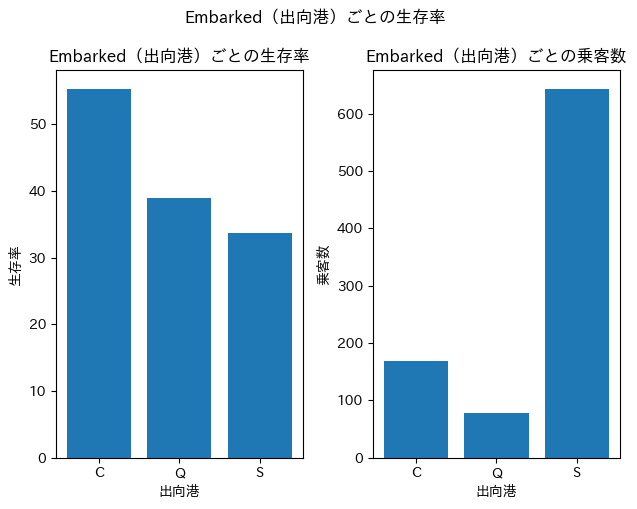

In [47]:
#Embarked（出向港）ごとの生存率
train_embarked = pd.pivot_table(train[["Embarked", "Survived", "Number"]], index="Embarked", aggfunc="sum").reset_index()
train_embarked["Surv_rate"]=(train_embarked["Survived"]/train_embarked["Number"])*100
print(train_embarked)

plt.figure()

plt.subplot(1,2,1)
plt.bar(train_embarked["Embarked"], train_embarked["Surv_rate"])
plt.title("Embarked（出向港）ごとの生存率")
plt.xlabel("出向港")
plt.ylabel("生存率")

plt.subplot(1,2,2)
plt.bar(train_embarked["Embarked"], train_embarked["Number"])
plt.title("Embarked（出向港）ごとの乗客数")
plt.xlabel("出向港")
plt.ylabel("乗客数")

plt.tight_layout()
plt.suptitle("Embarked（出向港）ごとの生存率", x=0.5, y=1.05)
plt.show()